when correlation is more, auto regression model is more suitable

In [ ]:
import pandas as pd
df=pd.read_csv('/content/milk.csv')
df

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403
5,6,371
6,7,382
7,8,358
8,9,594
9,10,482


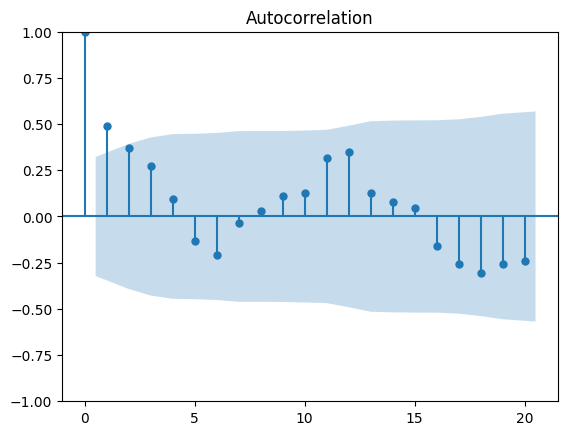

In [ ]:
#acf means auto correlation function

from statsmodels.graphics.tsaplots import plot_acf
acf=plot_acf(df.demand,lags=20)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima=ARIMA(df.demand[0:30],order=(1,0,0)) #order takes 3 args, p,q,r : p means AR, q and r means MA , we wants to make
arima_model=arima.fit()

In [ ]:
forecast=arima_model.predict(30,36)
forecast

,predicted_mean
30,480.152745
31,497.710449
32,506.007896
33,509.929117
34,511.782213
35,512.657953
36,513.071811


In [ ]:
#moving average MA

from statsmodels.tsa.arima.model import ARIMA
arima=ARIMA(df.demand[0:30],order=(0,0,1)) #order takes 3 args, p,q,r : p means AR, q and r means MA , we wants to make
arima_model=arima.fit()

In [ ]:
forecast=arima_model.predict(30,36)
forecast

,predicted_mean
30,509.884760
31,517.021294
32,517.021294
33,517.021294
34,517.021294
35,517.021294
36,517.021294


In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   30
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -184.297
Date:                Wed, 12 Feb 2025   AIC                            374.595
Time:                        12:37:35   BIC                            378.799
Sample:                             0   HQIC                           375.940
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.0213     31.024     16.665      0.000     456.215     577.827
ma.L1          0.3173      0.224      1.414      0.157      -0.122       0.757
sigma2      1.265e+04   4209.484      3.004      0.003    4395.561    2.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 2.21
Prob(Q):                              0.52   Prob(JB):                         0.33
Heteroskedasticity (H):               2.25   Skew:                             0.66
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""